In [92]:
import pandas as pd
import pickle
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report # Accuracy metrics 


In [93]:
df = pd.read_csv('Dataset/csv/finale_coords.csv')

In [94]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z8,v8,x9,y9,z9,v9,x10,y10,z10,v10
0,Jab,0.580828,0.542808,-0.871887,0.993958,0.396217,0.529700,-0.748912,0.999043,0.652624,...,0.0,0.0,7.0,19.0,0.0,0.0,-121.0,56.0,0.0,0.0
1,Jab,0.624016,0.444220,-0.458643,0.964183,0.401233,0.441734,-0.480877,0.998124,0.673019,...,0.0,0.0,-2.0,14.0,0.0,0.0,-130.0,61.0,0.0,0.0
2,Jab,0.627237,0.425056,-0.652282,0.967013,0.400973,0.418713,-0.565464,0.998300,0.669912,...,0.0,0.0,0.0,17.0,0.0,0.0,-128.0,58.0,0.0,0.0
3,Jab,0.630454,0.420857,-0.745308,0.964914,0.404070,0.385788,-0.590922,0.998329,0.698868,...,0.0,0.0,1.0,18.0,0.0,0.0,-132.0,57.0,0.0,0.0
4,Jab,0.566888,0.509008,-0.747998,0.968378,0.393309,0.498437,-0.636722,0.998484,0.621696,...,0.0,0.0,2.0,24.0,0.0,0.0,-133.0,51.0,0.0,0.0


In [95]:
X = df.drop('class', axis=1) # features
y = df['class'] # target value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1234)

In [96]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import *
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier

In [97]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'knn':make_pipeline(StandardScaler(), KNeighborsClassifier()),
    'svm':make_pipeline(StandardScaler(), SVC(probability=True)),
    'nb':make_pipeline(StandardScaler(), GaussianNB()),
    'dt':make_pipeline(StandardScaler(), DecisionTreeClassifier()),
    'ovr':make_pipeline(StandardScaler(), OneVsRestClassifier(SVC(probability=True))),
    'ovr_lr':make_pipeline(StandardScaler(), OneVsRestClassifier(LogisticRegression())),
    # 'svm_m':make_pipeline(StandardScaler(), SVM )
}

In [98]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

In [99]:
fit_models['ovr'].predict(X_test)

array(['Straight', 'Idle', 'Idle', 'Left_Hook', 'Right_Hook',
       'Left_Uppercut', 'Left_Hook', 'Straight', 'Idle', 'Left_Uppercut',
       'Idle', 'Straight', 'Guard', 'Guard', 'Right_Hook', 'Right_Hook',
       'Straight', 'Left_Uppercut', 'Idle', 'Straight', 'Guard', 'Idle',
       'Right_Hook', 'Straight', 'Right_Uppercut', 'Guard', 'Straight',
       'Idle', 'Left_Hook', 'Idle', 'Guard', 'Idle', 'Left_Hook',
       'Right_Uppercut', 'Left_Hook', 'Left_Uppercut', 'Left_Hook',
       'Right_Uppercut', 'Jab', 'Guard', 'Guard', 'Straight', 'Straight',
       'Left_Uppercut', 'Straight', 'Jab', 'Guard', 'Jab', 'Straight',
       'Right_Hook', 'Right_Hook', 'Jab', 'Right_Hook', 'Guard', 'Idle',
       'Jab', 'Straight', 'Left_Uppercut', 'Left_Hook', 'Guard', 'Guard',
       'Right_Uppercut', 'Jab', 'Right_Hook', 'Right_Uppercut', 'Jab',
       'Right_Hook', 'Right_Uppercut', 'Right_Uppercut', 'Left_Hook',
       'Jab', 'Left_Hook', 'Right_Hook', 'Right_Hook', 'Right_Hook',
       'St

# Scoring

In [100]:
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle 

In [101]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

lr 0.981651376146789
rf 0.981651376146789
knn 0.981651376146789
svm 1.0
nb 1.0
dt 0.8990825688073395
ovr 1.0
ovr_lr 0.981651376146789


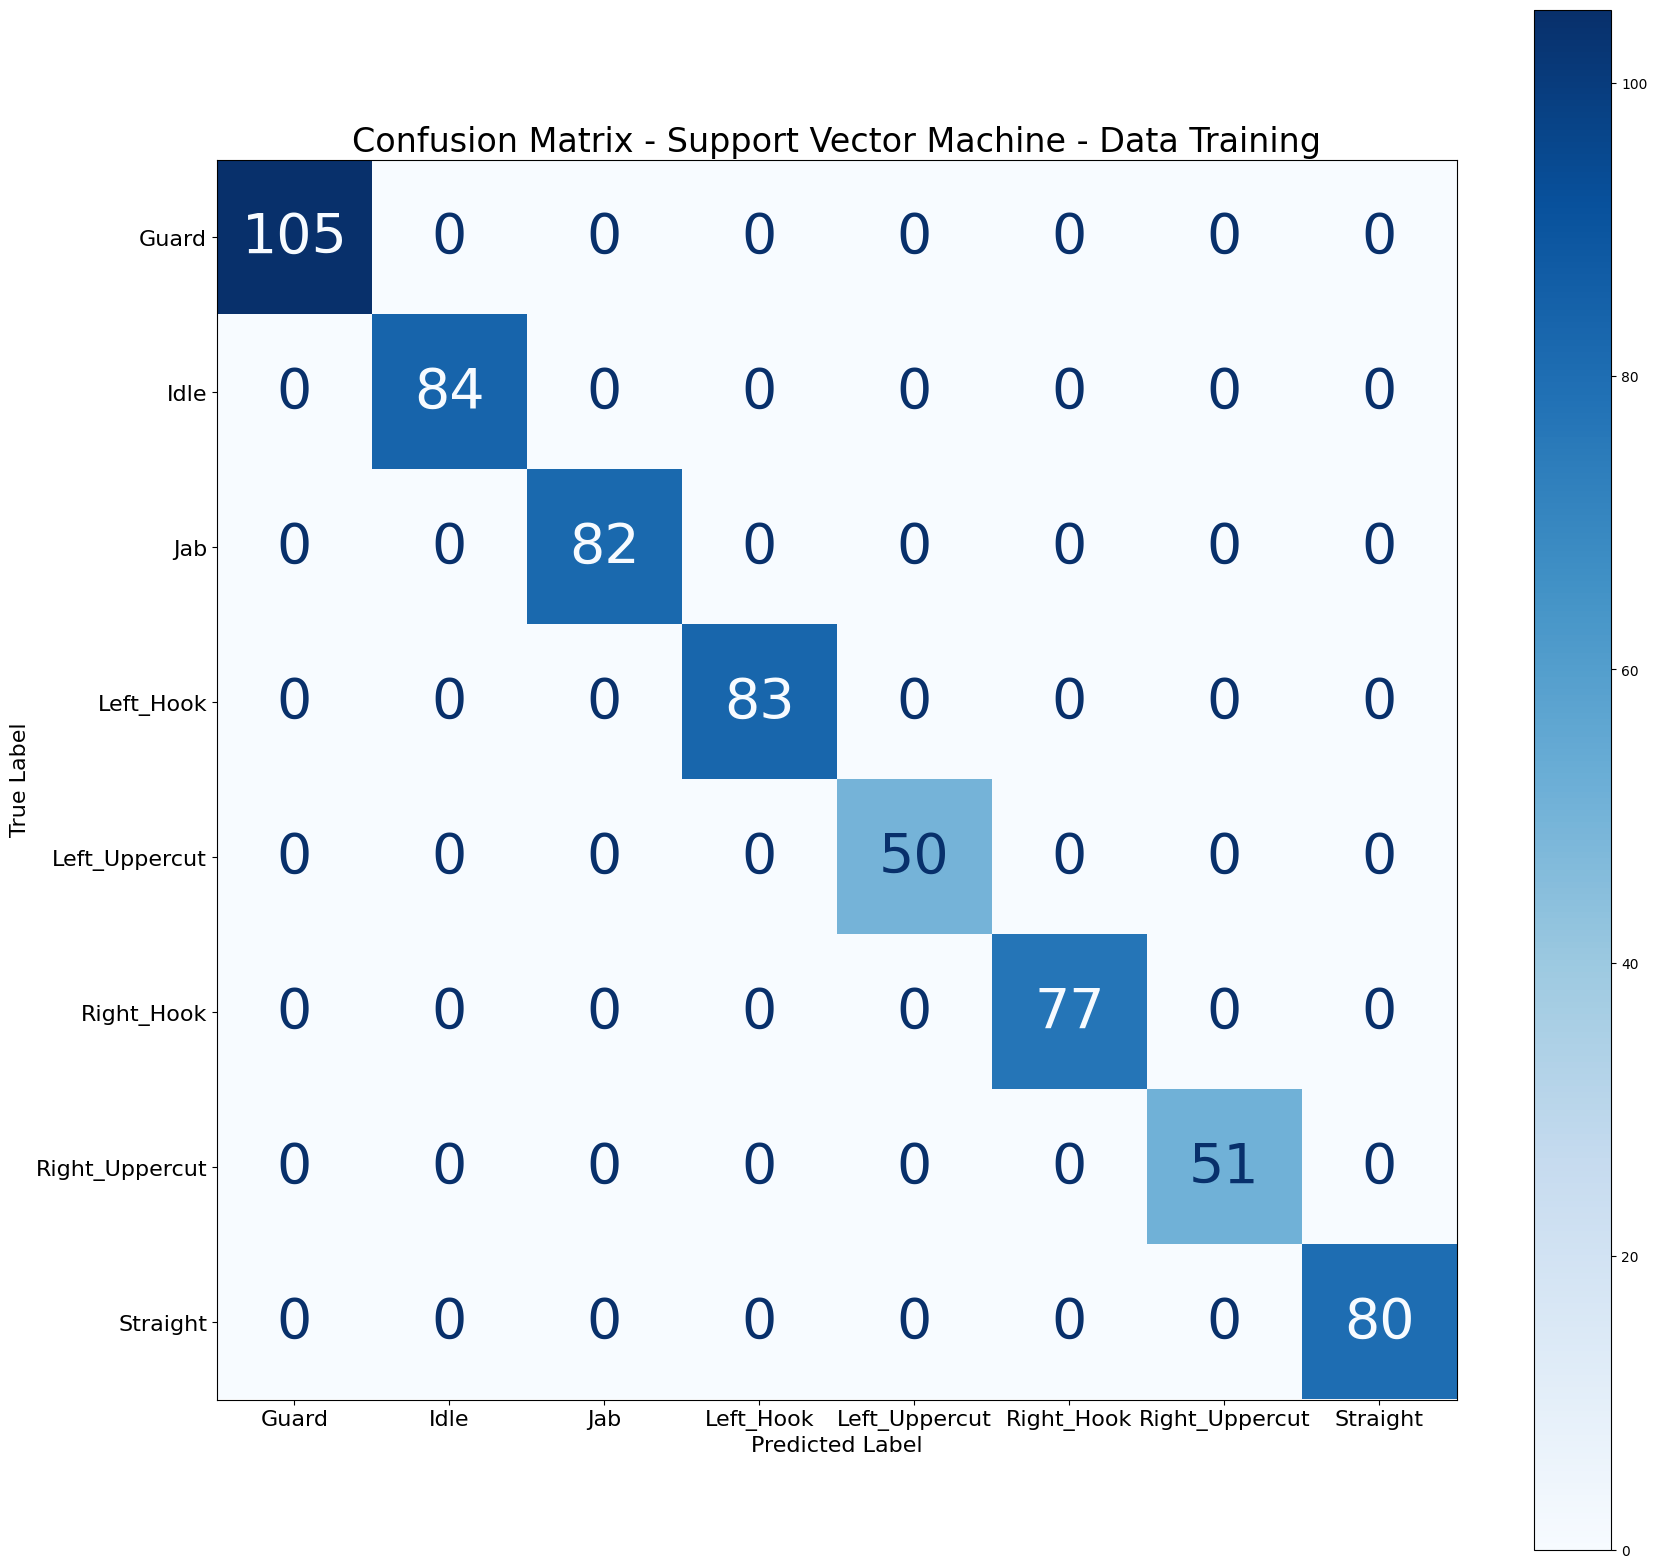

In [102]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model = 'svm'
test = "Training"

if test == "Training":
    data_y, data_x = y_train, X_train
elif test == "Test":
    data_y, data_x = y_test, X_test

# Generate predictions
y_pred = fit_models[model].predict(data_x)

# Compute confusion matrix
cm = confusion_matrix(data_y, y_pred, labels=fit_models[model].classes_)

# Display confusion matrix
fig, ax = plt.subplots(figsize=(20, 20))  # Increase figure size
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=fit_models[model].classes_)
disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='d')

# Increase font size of the values inside the table
for texts in disp.text_.ravel():
    texts.set_fontsize(40)

plt.xticks(fontsize=16)  # Increase font size of x-axis labels
plt.yticks(fontsize=16)  # Increase font size of y-axis labels
plt.title(f'Confusion Matrix - Support Vector Machine - Data {test}', fontsize=24)  # Increase font size of title
plt.xlabel('Predicted Label', fontsize=16)  # Increase font size of x-axis label
plt.ylabel('True Label', fontsize=16)  # Increase font size of y-axis label
plt.show()

In [ ]:
# Initialize a dictionary to store the results
confusion_matrices = {}

# Iterate through each model
for algo, model in fit_models.items():
    # Generate predictions
    y_pred = model.predict(X_train)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_train, y_pred, labels=fit_models['ovr_lr'].classes_)
    
    # Calculate TP, TN, FP, FN
    TP = np.diag(cm).sum()
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    
    # Store the results
    confusion_matrices[algo] = {
        'TP': TP,
        'TN': TN.sum(),
        'FP': FP.sum(),
        'FN': FN.sum()
    }

# Display the results
for algo, metrics in confusion_matrices.items():
    print(f"Model: {algo}")
    print(f"TP: {metrics['TP']}, TN: {metrics['TN']}, FP: {metrics['FP']}, FN: {metrics['FN']}\n")

Model: lr
TP: 612, TN: 0, FP: 0, FN: 0

Model: rf
TP: 612, TN: 0, FP: 0, FN: 0

Model: knn
TP: 602, TN: 60, FP: 10, FN: 10

Model: svm
TP: 612, TN: 0, FP: 0, FN: 0

Model: nb
TP: 603, TN: 54, FP: 9, FN: 9

Model: dt
TP: 612, TN: 0, FP: 0, FN: 0

Model: ovr
TP: 610, TN: 12, FP: 2, FN: 2

Model: ovr_lr
TP: 611, TN: 6, FP: 1, FN: 1



In [46]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Initialize a dictionary to store the results
confusion_matrices = {}

# Iterate through each model
for algo, model in fit_models.items():
    # Generate predictions
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=fit_models['ovr_lr'].classes_)
    
    # Calculate TP, TN, FP, FN
    TP = np.diag(cm).sum()
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    
    # Calculate probabilities
    y_prob = model.predict_proba(X_test)
    
    # Calculate true negatives based on probability threshold
    TN = np.sum((y_prob.max(axis=1) < 0.80) & (y_test == y_pred))
    
    # Store the results
    confusion_matrices[algo] = {
        'TP': TP,
        'TN': TN.sum(),
        'FP': FP.sum(),
        'FN': FN.sum()
    }

# Display the results
for algo, metrics in confusion_matrices.items():
    print(f"Model: {algo}")
    print(f"TP: {metrics['TP']}, TN: {metrics['TN']}, FP: {metrics['FP']}, FN: {metrics['FN']}\n")



Model: lr
TP: 107, TN: 5, FP: 2, FN: 2

Model: rf
TP: 108, TN: 15, FP: 1, FN: 1

Model: knn
TP: 107, TN: 3, FP: 2, FN: 2

Model: svm
TP: 109, TN: 8, FP: 0, FN: 0

Model: nb
TP: 109, TN: 0, FP: 0, FN: 0

Model: dt
TP: 100, TN: 0, FP: 9, FN: 9

Model: ovr
TP: 109, TN: 2, FP: 0, FN: 0

Model: ovr_lr
TP: 107, TN: 15, FP: 2, FN: 2



In [48]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Initialize a dictionary to store the results
confusion_matrices = {}

# Iterate through each model
for algo, model in fit_models.items():
    # Generate predictions
    y_pred = model.predict(X_train)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_train, y_pred, labels=fit_models['ovr_lr'].classes_)
    
    # Calculate TP, TN, FP, FN
    TP = np.diag(cm).sum()
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    
    # Calculate probabilities
    y_prob = model.predict_proba(X_train)
    
    # Calculate true negatives based on probability threshold
    TN = np.sum((y_prob.max(axis=1) < 0.80) & (y_train == y_pred))
    
    # Store the results
    confusion_matrices[algo] = {
        'TP': TP,
        'TN': TN.sum(),
        'FP': FP.sum(),
        'FN': FN.sum()
    }

# Display the results
for algo, metrics in confusion_matrices.items():
    print(f"Model: {algo}")
    print(f"TP: {metrics['TP']}, TN: {metrics['TN']}, FP: {metrics['FP']}, FN: {metrics['FN']}\n")



Model: lr
TP: 612, TN: 13, FP: 0, FN: 0

Model: rf
TP: 612, TN: 12, FP: 0, FN: 0

Model: knn
TP: 602, TN: 21, FP: 10, FN: 10

Model: svm
TP: 612, TN: 16, FP: 0, FN: 0

Model: nb
TP: 603, TN: 3, FP: 9, FN: 9

Model: dt
TP: 612, TN: 0, FP: 0, FN: 0

Model: ovr
TP: 610, TN: 7, FP: 2, FN: 2

Model: ovr_lr
TP: 611, TN: 56, FP: 1, FN: 1



In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize a dictionary to store the results
scoring_metrics = {}

# Iterate through each model
for algo, metrics in confusion_matrices.items():
    TP = metrics['TP']
    TN = metrics['TN']
    FP = metrics['FP']
    FN = metrics['FN']
    
    # Calculate accuracy, precision, recall, and f1-score
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    
    # Store the results
    scoring_metrics[algo] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

# Display the results
for algo, scores in scoring_metrics.items():
    print(f"Model: {algo}")
    print(f"Accuracy: {scores['accuracy']:.4f}, Precision: {scores['precision']:.4f}, Recall: {scores['recall']:.4f}, F1-Score: {scores['f1_score']:.4f}\n")

Model: lr
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000

Model: rf
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000

Model: knn
Accuracy: 0.9689, Precision: 0.9837, Recall: 0.9837, F1-Score: 0.9837

Model: svm
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000

Model: nb
Accuracy: 0.9712, Precision: 0.9853, Recall: 0.9853, F1-Score: 0.9853

Model: dt
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000

Model: ovr
Accuracy: 0.9936, Precision: 0.9967, Recall: 0.9967, F1-Score: 0.9967

Model: ovr_lr
Accuracy: 0.9970, Precision: 0.9984, Recall: 0.9984, F1-Score: 0.9984



In [91]:
models_to_save = ['svm', 'rf', 'knn']
version = 1

for model_name in models_to_save:
    model = fit_models[model_name]
    with open(f'../Model/v{version}_{model_name}_model.pkl', 'wb') as f:
        pickle.dump(model, f)